# Exercise 2
Author: Tobias Famos
For the course Machine Learning and Data Mining

## Import statements

In [125]:
import pandas
import matplotlib.pyplot as plot
from sklearn.naive_bayes import  GaussianNB
from sklearn import preprocessing
from mlxtend.evaluate import accuracy_score
from sklearn.model_selection import train_test_split



## Task 1: Titanic
## Preprocessing
Fist lets load the Data

In [126]:
titanic = pandas.read_csv("Data/titanic.csv")
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


Now, we need to create labels from the binary attributes (Sex and Survived)

In [127]:
le = preprocessing.LabelEncoder()
titanic["Sex"] = le.fit_transform(titanic["Sex"])
titanic["Survived"] = le.fit_transform(titanic["Survived"])
titanic["Name"] = le.fit_transform(titanic["Name"])

## Subtask a)
As we can see from the code lines below, the tho most siginificant correlations are Sex and PClass (to have them sorted we aI applied the Absolute values)

In [128]:
correlation = titanic.corr()["Survived"]
correlation = correlation.apply(lambda entry: abs(entry))
print(correlation.sort_values(ascending=False))

Survived                   1.000000
Sex                        0.542152
Pclass                     0.336528
Fare                       0.256179
Name                       0.103486
Parents/Children Aboard    0.080097
Age                        0.059665
Siblings/Spouses Aboard    0.037082
Name: Survived, dtype: float64


## Subtask b)
Define a training and evaluation function based on a 75 / 25 split using naive Bayes.

In [129]:
def predict_and_evaluate_bayes(attributes, target_value):
    naive_bayes = GaussianNB()

    attributes_train, attributes_test, target_value_train, target_value_test = train_test_split(attributes, target_value, test_size=0.25, random_state=12)

    naive_bayes.fit(attributes_train, target_value_train)
    test_predictions = naive_bayes.predict(attributes_test)
    accuracy = accuracy_score(target_value_test, test_predictions)
    print(f'Accuracy: {round(accuracy,4)} for Naive Bayes based on {attributes.keys()}' )
    return accuracy

Select the two highest correlated predictors. and the targe value

In [130]:
titanic_correlated_predictors = titanic[["Sex", "Pclass"]]
titanic_target_value = titanic["Survived"]

Now lets train and evaluate the model based on Sex and class:

In [131]:
accuracy = predict_and_evaluate_bayes(titanic_correlated_predictors, titanic_target_value)

Accuracy: 0.8243 for Naive Bayes based on Index(['Sex', 'Pclass'], dtype='object')


## Subtask c)
Now lets add all the predictors and compare.

In [132]:
titanic_all_predictors =titanic.loc[:,titanic.columns != 'Survived']
titanic_predictors = [titanic[["Sex"]],
    titanic[["Sex","Pclass"]],
    titanic[["Sex", "Pclass", "Fare"]],
    titanic[["Sex", "Pclass", "Fare","Name"]],
    titanic[["Sex", "Pclass", "Fare","Name", "Parents/Children Aboard"]],
    titanic[["Sex", "Pclass", "Fare","Name", "Parents/Children Aboard","Age"]],
    titanic.loc[:,titanic.columns != 'Survived'],
]

accuracies = []
labels = []
for predictor in titanic_predictors:
    accuracies.append(predict_and_evaluate_bayes(predictor, titanic_target_value))
    labels.append(len(predictor.keys()))



Accuracy: 0.8243 for Naive Bayes based on Index(['Sex'], dtype='object')
Accuracy: 0.8243 for Naive Bayes based on Index(['Sex', 'Pclass'], dtype='object')
Accuracy: 0.7387 for Naive Bayes based on Index(['Sex', 'Pclass', 'Fare'], dtype='object')
Accuracy: 0.7883 for Naive Bayes based on Index(['Sex', 'Pclass', 'Fare', 'Name'], dtype='object')
Accuracy: 0.8018 for Naive Bayes based on Index(['Sex', 'Pclass', 'Fare', 'Name', 'Parents/Children Aboard'], dtype='object')
Accuracy: 0.8063 for Naive Bayes based on Index(['Sex', 'Pclass', 'Fare', 'Name', 'Parents/Children Aboard', 'Age'], dtype='object')
Accuracy: 0.8018 for Naive Bayes based on Index(['Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


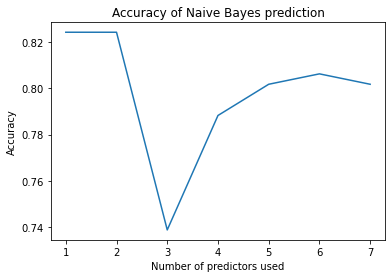

In [133]:
plot.plot(labels, accuracies)
plot.title("Accuracy of Naive Bayes prediction")
plot.xlabel("Number of predictors used")
plot.ylabel("Accuracy")
plot.show()

Now we can interprete these results:
Firstly, there seems to be no improvement by using two predictors Sex and Class instead of only Sex. This is constant over multiple seeds for the train / test split. Secondly, we can see that the accuracy drops and rises again. This is a good sign that we did overfit our data by using all the predictors availabale.
Also, in my opinion, it is extremely useless to use a generated class over the names